### Data Science Process 

#### Description:
Mục đích của bài tập này để hiểu các bước liên quan đến môi trường Data Science

#### Data Description 
Bộ dữ liệu các chuyến đi xe đạp công cộng - gồm 185 trạm với 1750 chiếc xe.
Bộ dữ liệu gồm các bảng và các feature sau: 
    
    * Station:
        * ID: ID của xe đạp 
        * Terminal: 
        * Station: 
        * Municipal
        * lat: 
        * lng: 
        * status: 

    * Trips: 
        * Unnamed: 0 
        * hubway_id: 
        * duration: 
        * start_date:
        * strt_statn: 
        * end_date:
        * end_statn: 
        * zip_code: 
        * birth_date:
        * gender: 

        

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from math import radians, cos, sin, asin, sqrt 


#### Read data 

In [5]:
stations = pd.read_csv("data/hubway_stations.csv")
trips = pd.read_csv("data/hubway_trips.csv")

In [7]:
stations.head(5)

,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing
2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing
3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing
4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing


In [8]:
trips.head(5)

,Unnamed: 0,hubway_id,duration,start_date,strt_statn,end_date,end_statn,zip_code,birth_date,gender
0,426015,482077,675,8/18/2012 19:48:00,8.0,8/18/2012 20:00:00,8.0,'02134,1983.0,Male
1,193080,220612,204,4/26/2012 18:14:00,31.0,4/26/2012 18:17:00,64.0,'02210,1953.0,Male
2,530051,598721,888,9/23/2012 09:26:00,39.0,9/23/2012 09:41:00,39.0,'02118,1985.0,Male
3,484594,547645,526,9/8/2012 12:55:00,88.0,9/8/2012 13:04:00,72.0,'02139,1985.0,Male
4,291265,332163,554,6/21/2012 18:53:00,47.0,6/21/2012 19:02:00,54.0,'02113,1986.0,Female


#### Understanding the data 

In [9]:
stations.dtypes

id             int64
terminal      object
station       object
municipal     object
lat          float64
lng          float64
status        object
dtype: object

In [11]:
trips.dtypes

Unnamed: 0      int64
hubway_id       int64
duration        int64
start_date     object
strt_statn    float64
end_date       object
end_statn     float64
zip_code       object
birth_date    float64
gender         object
dtype: object

#### Quesion 0: Dựa trên datatype, bạn có thấy gì bất thường ko ? 

##### Answer 0: Có 
    
    * Station : 
        * status: Boolean 
        * 
    * Trips: 
        * start_date: Date 
        * end_date: Date
        * zip_code: int 
        * birth_date: int 
        * gender: boolean

In [12]:
stations.describe()

,id,lat,lng
count,142.000000,142.000000,142.000000
mean,74.323944,42.354820,-71.089087
std,41.389098,0.020089,0.027111
min,3.000000,42.309467,-71.146452
25%,39.250000,42.341652,-71.113183
50%,74.500000,42.353373,-71.089191
75%,109.750000,42.366265,-71.065210
max,145.000000,42.404490,-71.035705


In [13]:
trips.describe() 

,Unnamed: 0,hubway_id,duration,strt_statn,end_statn,birth_date
count,210239.000000,210239.000000,2.102390e+05,210239.000000,210239.000000,210239.000000
mean,283491.142771,321401.542806,7.794459e+02,36.727567,36.662261,1976.285594
std,153204.497985,173059.875974,1.349006e+04,18.592716,18.551934,11.002281
min,0.000000,8.000000,0.000000e+00,3.000000,3.000000,1932.000000
25%,153899.000000,174103.000000,3.460000e+02,22.000000,22.000000,1969.000000
50%,280081.000000,319856.000000,5.320000e+02,38.000000,38.000000,1979.000000
75%,414740.000000,469290.000000,8.280000e+02,50.000000,50.000000,1985.000000
max,549285.000000,620312.000000,5.351083e+06,98.000000,98.000000,1995.000000


#### Question 1: Dựa trên hiểu biết của bạn về data. Câu hỏi nào bạn muốn được trả lời nhất ? 
##### Answer 1: 
    * Trung bình lượt mượn lại các trạm? Trạm nào đông nhất? Trạm nào ít nhất ? Một vài lí do tại sao ? 
    * Thường nam hay nữ đap nhiều hơn? Độ tuổi trung bình là bao nhiêu ? 
    * Họ thường đạp vào khoảng thời gian nào ? Vào thời gian đấy thì thường là đạp thể dục hay đạp có việc ? 
    * Quãng đường di chuyển trung bình là bao nhiêu ? 
    * Tỉ lệ lượt mượn lại của một người như thế nào ? 
    ........

#### Data Pre-Processing 

In [15]:
## Loại bỏ các hàng có phần tử trống 
stations.dropna(axis = 0, inplace = True) 
trips.dropna(axis = 0, inplace = True) 


In [18]:
## Tạo một cột - AGE  
trips['age'] = 2023.0 - trips['birth_date'].values
trips.drop('birth_date',axis = 1 , inplace= True)
trips.head()

,Unnamed: 0,hubway_id,duration,start_date,strt_statn,end_date,end_statn,zip_code,gender,age
0,426015,482077,675,8/18/2012 19:48:00,8.0,8/18/2012 20:00:00,8.0,'02134,Male,40.0
1,193080,220612,204,4/26/2012 18:14:00,31.0,4/26/2012 18:17:00,64.0,'02210,Male,70.0
2,530051,598721,888,9/23/2012 09:26:00,39.0,9/23/2012 09:41:00,39.0,'02118,Male,38.0
3,484594,547645,526,9/8/2012 12:55:00,88.0,9/8/2012 13:04:00,72.0,'02139,Male,38.0
4,291265,332163,554,6/21/2012 18:53:00,47.0,6/21/2012 19:02:00,54.0,'02113,Female,37.0


#### EDA - Exploratory Data Analyst

Nhưng thông tin ở trên không đủ để trích xuất thông tin cũng như đặt ra nhưng câu hỏi đầy đủ để khai thác được thông tin -> vì thế chúng ta cần EDA 


[]

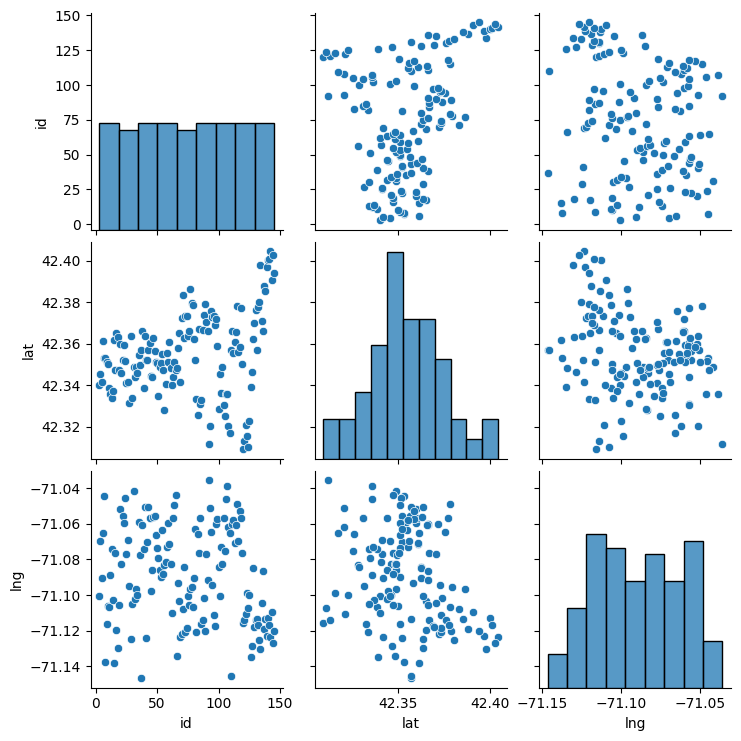

In [19]:
sns.pairplot(stations)
plt.plot()

#### Question 2: Dựa trên biểu đồ trên, bạn có nhận thấy mối quan hệ dễ nhận thấy giữa bất kỳ cột nào ko ? 
    A. Lat và Long tỷ lệ thuận với nhau 
    B. Lat và Long tỷ lệ nghịch với nhau 
    C. Không có mối liên quan 

##### Answer 2: C  - nhìn vào hình (2,3) và hình (3,2) để thấy 

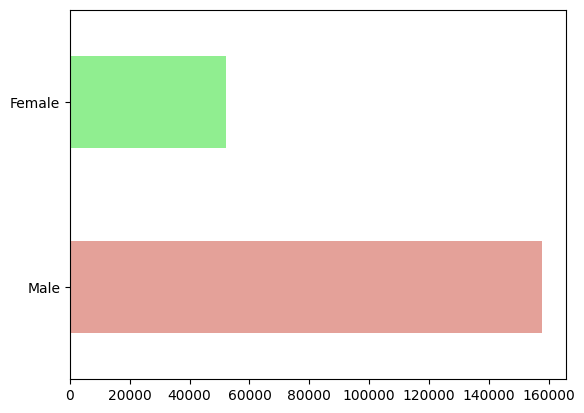

In [30]:
## Số lượng nam và nữ đạp xe ?? 

gender_count = trips['gender'].value_counts().plot(kind = 'barh',color=['#e4a199', 'lightgreen'])

#### Question 3: Dựa vào biểu đồ trên thì nam hay nữ mượn xe nhiều hơn 
##### Answer 3: Nam

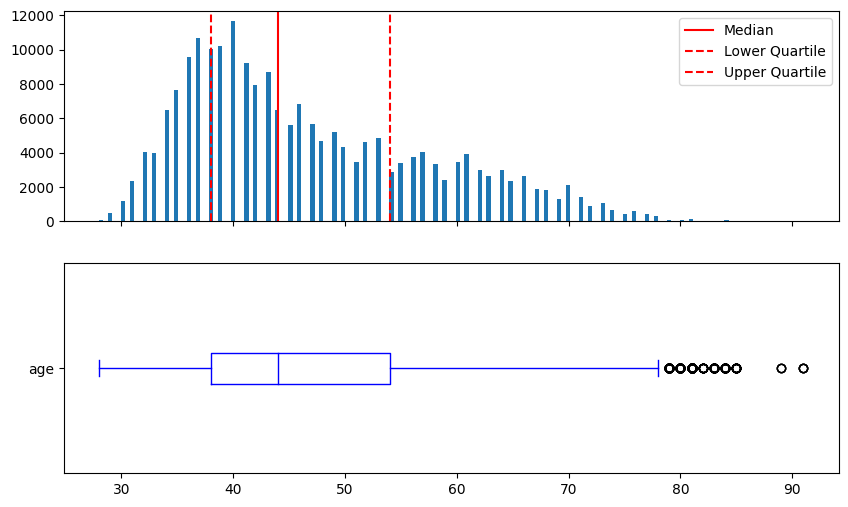

In [79]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.hist(trips['age'], bins=160)
ax1.axvline(x=np.median(trips['age']), color='red', label="Median")
ax1.axvline(x=np.percentile(trips['age'],25), color='red', label="Lower Quartile",linestyle ='--')
ax1.axvline(x=np.percentile(trips['age'],75), color='red', label="Upper Quartile",linestyle = '--')
ax1.legend()

ax2 = trips['age'].plot(kind='box', vert=False, color='blue')
plt.show()







#### Question 4: Dựa trên biểu đồ trên, ai là người sử dụng xe đạp nhiều hơn ? 
A. Người già 

B. Người trẻ 
##### Answer 4: B. Người trẻ 

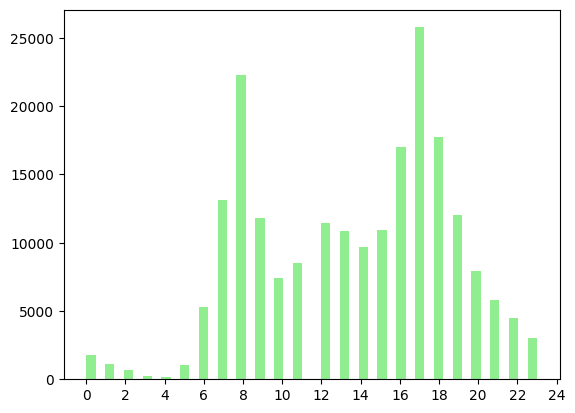

In [94]:
k_out_hours = trips['start_date'].apply(lambda s: int(s[-8:-6])) 
plt.hist(k_out_hours,bins = 48,color='lightgreen') 
plt.xticks(range(0,25,2))
plt.show()

#### Question 5: Người ta thường đạp xe vào giờ nào ?? 
##### Answer 5: Tầm 16h - 18h

#### More question ???? 

    * Vì lí do gì xe đạp được sử dụng ?? Giải trí ,Giao thông hay Sức Khỏe ?? 
    * Xe đạp thường đc sử dụng vào ngày nào trong tuần ??? 
    * Theo từng thành phố - thành phố nào sử dụng xe đạp nhiều nhất ???  

----------------------------------------------------------------

### Data Modelling 

Một số câu hỏi ko thể trả lời bằng các vẽ đồ thị mà phải kết hợp nhiều biến với nhau 

VD: 

    * Nhân khẩu học của người dùng ảnh hưởng thế nào đến thời gian sử dụng xe ?? 

    * Điều kiện thời tiết hoặc giao thông ảnh hường đến việc đạp xe như nào ??? 
    
    * Đặc điểm của vị trí nhà ga ảnh hưởng đến số lượng xe đạp được sử dụng ko ?? 

_Thử trả lời câu hỏi : Khoảng cách nhà ga và việc sử dụng xe đạp ảnh hưởng đến nhau ntn ??_

In [163]:
stations['municipal'].value_counts()

Boston        97
Cambridge     28
Somerville    12
Brookline      5
Name: municipal, dtype: int64

In [195]:

def haversine(pt):

    """
    Tính khoảng cách từ 1 điểm (lon1,lat1) đến điểm trung tâm (lon2,lat2)
    
    """
    location = {} 
    location['Boston'] = [42.355589,-71.060175]
    location['Cambridge'] = [52.205276,0.119167]
    location['Somerville'] = [42.387597,-71.099497]
    location['Brookline'] = [42.407211,-71.382439]

    lat2 =  location['Boston'][0]
    lon2 =  location['Boston'][1]
    lon1 = pt['lng'] 
    lat1 = pt['lat'] 
    

    lon1,lat1,lon2,lat2 = map(radians,[lon1,lat1,lon2,lat2])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 

    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    r = 3956  # Radius of earth in miles
    return c * r

In [182]:
stations_count = trips['strt_statn'].value_counts()
stations['Number of checkout'] = np.zeros(len(stations))
for i in stations_count.keys():
    stations.loc[stations['id'] == i,'Number of checkout'] = stations_count[i]

In [196]:
stations['distance'] = stations.apply(haversine,axis = 1)

In [185]:
stations.head(5)

,id,terminal,station,municipal,lat,lng,status,Number of checkout,distance
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing,1878.0,2.335706
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing,3376.0,0.853095
2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing,1913.0,1.802423
3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing,3616.0,0.467803
4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing,1384.0,0.807582


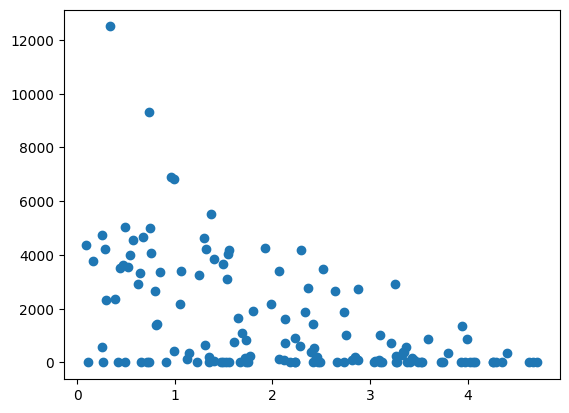

In [198]:
plt.scatter(stations['distance'],stations['Number of checkout'])

In [201]:
from sklearn.linear_model import LinearRegression 


clf = LinearRegression()
X = np.array(stations['distance']).reshape(-1, 1)
y = stations['Number of checkout']
clf.fit(X, y)

LinearRegression()

Text(0.5, 0, 'Distance')

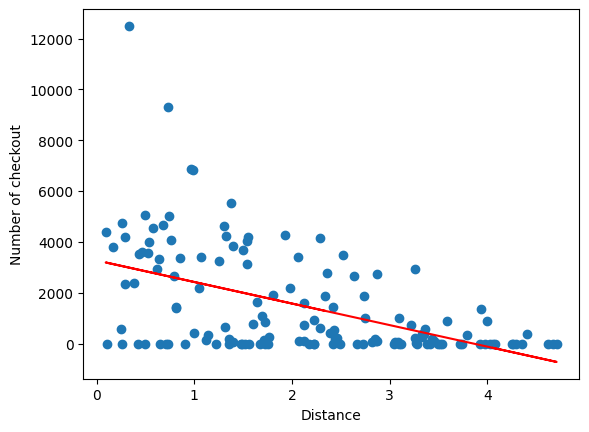

In [204]:
y_pred = clf.coef_*stations['distance'] + clf.intercept_ 
plt.scatter(stations['distance'],stations['Number of checkout'])
plt.plot(stations['distance'],y_pred,color = 'red')
plt.ylabel("Number of checkout")
plt.xlabel("Distance")

#### Question 6: Dựa vào Linear model trên hãy cho biết dự đoán số lượng checkout cho khoảng các 2.5 so với trung tâm là bn ? 

In [205]:
result = clf.coef_*2.5 + clf.intercept_
print('Result: ',result)

Result:  [1152.15660495]
